### Import the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

### Create ImageDataGenerator object 

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255, 
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [5]:
test_datagen = ImageDataGenerator(rescale=1/255)

### Read the Images

In [6]:
train = train_datagen.flow_from_directory('Dataset/training_set',
                                          target_size=(64,64),
                                          class_mode='binary')

Found 13 images belonging to 2 classes.


In [19]:
train.filenames

['apple\\1.jpg',
 'apple\\2.jpeg',
 'apple\\3.jpeg',
 'apple\\4.jpeg',
 'apple\\5.jpg',
 'apple\\6.jpg',
 'apple\\7.jpg',
 'orange\\1.jpeg',
 'orange\\2.jpg',
 'orange\\3.jpeg',
 'orange\\4.jpeg',
 'orange\\5.jpg',
 'orange\\6.jpg']

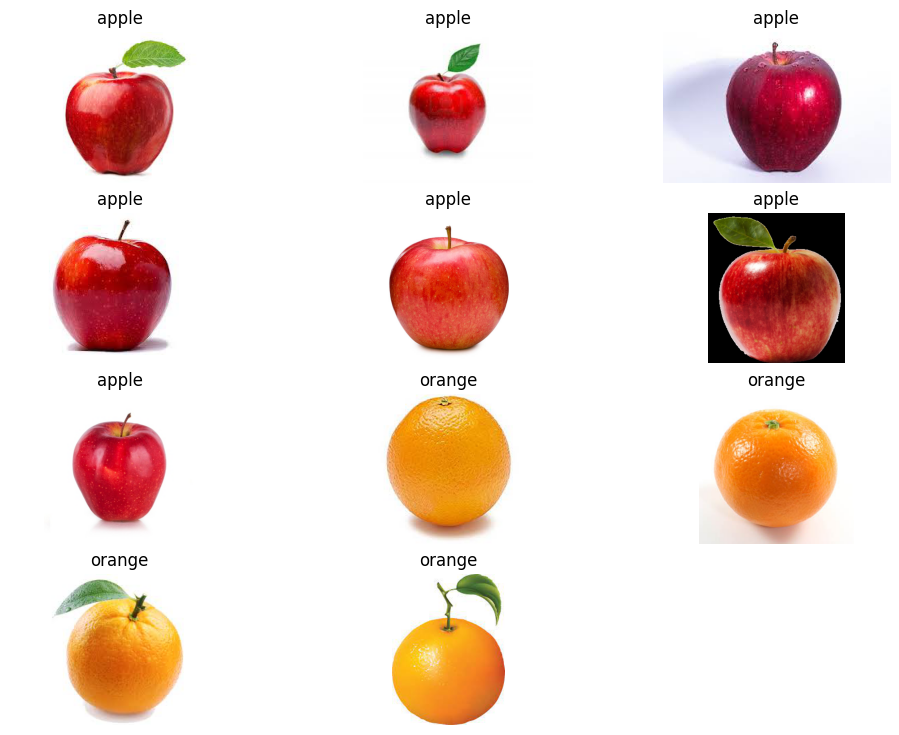

In [21]:
i=1
plt.figure(figsize=(12,9))
for fname in train.filenames:
    if i==12:
        break
    img = plt.imread(train.directory+'/'+fname)
    plt.subplot(4,3,i)
    i+=1
    plt.imshow(img)
    plt.title(fname.split('\\')[0])
    plt.axis('off')

In [22]:
test = test_datagen.flow_from_directory('Dataset/test_set',
                                          target_size=(64,64),
                                          class_mode='binary')

Found 6 images belonging to 2 classes.


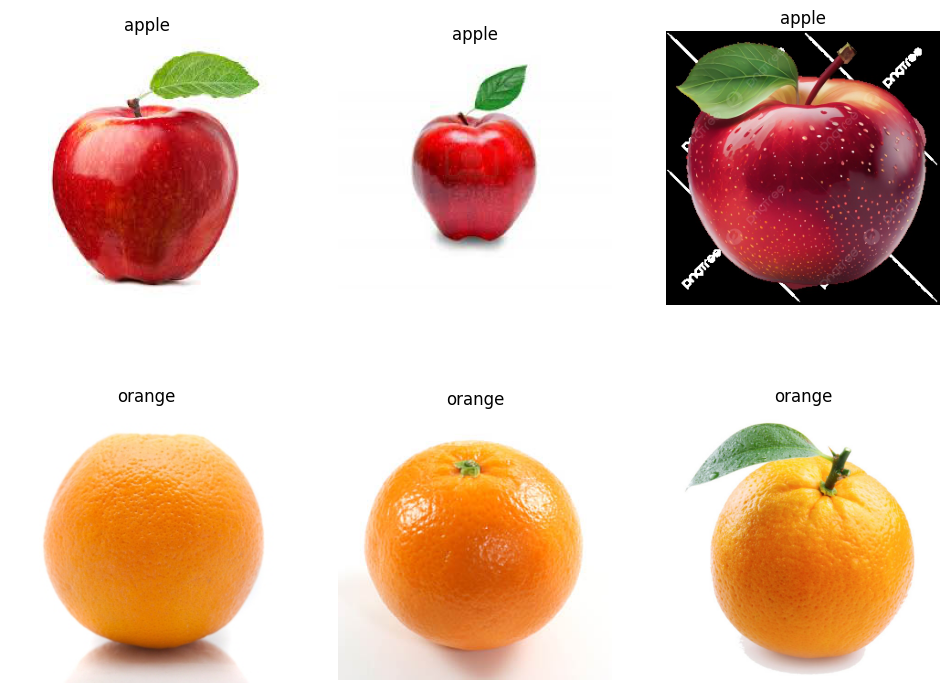

In [24]:
i=1
plt.figure(figsize=(12,9))
for fname in test.filenames:
    img = plt.imread(test.directory+'/'+fname)
    plt.subplot(2,3,i)
    i+=1
    plt.imshow(img)
    plt.title(fname.split('\\')[0])
    plt.axis('off')

### Build the Model

In [27]:
model= Sequential()

# 1st Convolution Layer
model.add(Conv2D(16, 3,
                 activation='relu',
                 input_shape=(64, 64, 3)
                 )) # 62*62*16

model.add(MaxPool2D((2, 2))) # 31*31*62

# 2nd Convolution Layer
model.add(Conv2D(8, 3,
                 activation='relu',
                 )) # 29*29*8

model.add(MaxPool2D((2, 2))) # 14*14*8

model.add(Flatten()) # 1568

model.add(Dense(16, activation='relu')) # reduced to 16 nodes

model.add(Dense(1, activation='sigmoid')) # 1 nodes

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
train.class_indices

{'apple': 0, 'orange': 1}

In [32]:
model.fit(train,
          epochs=20,
          validation_data=test
          )

Epoch 1/20


1/1 [==============================] - 2s 2s/step - loss: 0.6880 - accuracy: 0.5385 - val_loss: 0.6329 - val_accuracy: 0.8333
Epoch 2/20
1/1 [==============================] - 0s 204ms/step - loss: 0.6558 - accuracy: 0.4615 - val_loss: 0.5867 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 200ms/step - loss: 0.5913 - accuracy: 0.7692 - val_loss: 0.5464 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 237ms/step - loss: 0.5972 - accuracy: 0.7692 - val_loss: 0.5167 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 229ms/step - loss: 0.5395 - accuracy: 0.8462 - val_loss: 0.4809 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 263ms/step - loss: 0.4945 - accuracy: 0.9231 - val_loss: 0.4407 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 259ms/step - loss: 0.4829 - accuracy: 1.0000 - val_loss: 0.3981 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=====

### Predict the class of unseen data

In [46]:
import cv2
image = plt.imread('Dataset/sample1.jpg')

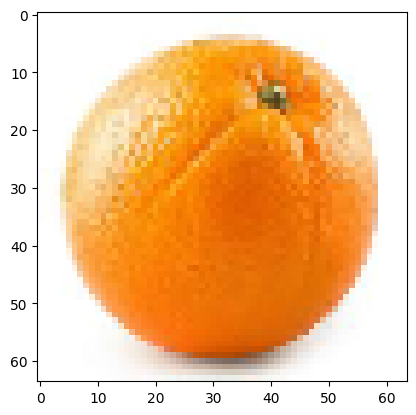

In [47]:
image = cv2.resize(image,(64,64))
plt.imshow(image)

In [48]:
image.shape

(64, 64, 3)

In [49]:
image = image.reshape(-1,image.shape[0], image.shape[1], 3)
image.shape 

(1, 64, 64, 3)

In [57]:
a = model.predict(image)[0][0].astype(int)

print('Orange' if a==1 else 'Apple')
    

1/1 [==============================] - 0s 33ms/step
Orange
